# Bandstructure of O-terminated graphite (armchair edge)

This notebook plots the band structure of AB-stacked graphite as computed using VASP and terminated with oxygen at the armchair edge. Bands are interpolated using Wannier orbital.   

## Total energy calculation

The band structure has been calculated using VASP 5.4.4. 

Key parameters include:

```
ENCUT = 450 eV
EDIFFG= -0.01
ISMEAR = 0; SIGMA = 0.05
IVDW=10
```

The structure was relaxed before a static calculation with a Gamma-centered 6x1x2 grid, but atomic movement in the z-direction was constrained. 


## Wannerisation

A Wannier basis was constructed for 120 bands using the following trial orbitals

| Centre                     | Symmetry | WF Number |
| -------------------------- | -------- | --------- |
| C-C bond centers           | 64x s    | 1-64      |
| C                          | 44x pz   | 65-108    |
| C-O bond centers           | 4x s     | 109-112   |
| O                          | 4x px,pz | 113-120   |

It was fairly difficult to disentangle the sp2 and pz manifolds. This has only been achieved by disregarding the (empty) anti-bonding sp2 states and by using bond-centered intial s functions for the sp2 manifold. The resulting individual Wannier functions are horrible: they are strongly distributed across the slabs without any disserable orbital shape. But the sum of WFs in a manifold gives meaningful results.

![WF manifolds]("manifolds.png")

# Loading data

In [5]:
import pandas as pd

data = pd.read_table("wannier90.dn_band_C_sp2.dat", delimiter="\s+", header=None, names=["k-point","energy","sp2"])
data_2 = pd.read_table("wannier90.dn_band_C_pz.dat", delimiter="\s+", header=None, names=["k-point","energy","pz"])
data_3 = pd.read_table("wannier90.dn_band_O-C.dat", delimiter="\s+", header=None, names=["k-point","energy","OC"])
data_4 = pd.read_table("wannier90.dn_band_O_pz.dat", delimiter="\s+", header=None, names=["k-point","energy","Opz"])

data['pz'] = data_2['pz']
data['OC'] = data_3['OC']
data['Opz']= data_4['Opz']

## Plot band structure

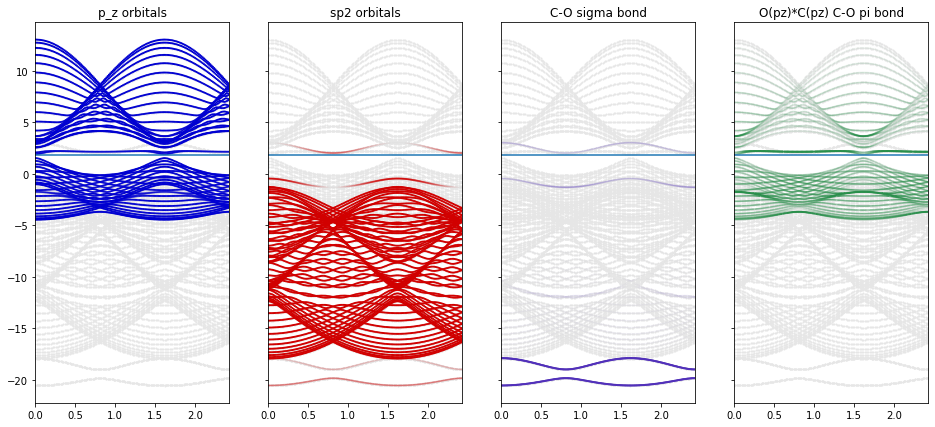

In [49]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import to_rgba

cdict1 = {'red':  ((0.00, 0.8, 0.8),
                   (1.00, 0.9, 0.9)),

         'green': ((0.00, 0.8, 0.8),
                   (1.00, 0.0, 0.0)),

         'blue': ((0.00, 0.8, 0.8),
                   (1.00, 0.0, 0.0))
        }

cdict2 = {'red':  ((0.00, 0.8, 0.8),
                   (1.00, 0.0, 0.0)),

         'green': ((0.00, 0.8, 0.8),
                   (1.00, 0.0, 0.0)),

         'blue': ((0.00, 0.8, 0.8),
                   (1.00, 0.9, 0.9))
        }

cdict3 = {'red':  ((0.00, 0.8, 0.8),
                   (1.00, 41/255., 0.0)),

         'green': ((0.00, 0.8, 0.8),
                   (1.00, 143/255.0, 0.0)),

         'blue': ((0.00, 0.8, 0.8),
                   (1.00, 75/255., 0.0))
        }


cdict4 = {'red':  ((0.00, 0.8, 0.8),
                   (1.00, 81/255., 0.0)),

         'green': ((0.00, 0.8, 0.8),
                   (1.00, 48/255., 0.0)),

         'blue': ((0.00, 0.8, 0.8),
                   (1.00, 186/255.0, 0.0))
        }

gray_red = LinearSegmentedColormap('GrayRed', cdict1)
gray_blue = LinearSegmentedColormap('GrayBlue', cdict2)
gray_green = LinearSegmentedColormap('GrayGreen', cdict3)
gray_purple = LinearSegmentedColormap('GrayPurple', cdict4)

cmap_alpha = lambda n,c : LinearSegmentedColormap.from_list(n, [(0, to_rgba(c,0)), (1, to_rgba(c,1))])

color_red = (209/255.,0/255.,0/255.)
color_green = (41/255.,143/255.,75/255.)
color_blue = (0/255.,0/255.,209/255.)
color_purple = (81/255.,48/255.,186/255.)

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(16,7));

ax1.scatter(data['k-point'],data['energy'], s=1.0, color=(0.9,0.9,0.9))
ax1.scatter(data['k-point'],data['energy'], s=1.0, c=data['pz'], cmap=cmap_alpha('cr',color_blue))
ax1.axhline(y=[1.8014])
ax1.set_xlim(min(data['k-point']),max(data['k-point']))
ax1.set_title('p_z orbitals')

ax2.scatter(data['k-point'],data['energy'], s=1.0, color=(0.9,0.9,0.9))
ax2.scatter(data['k-point'],data['energy'], s=1.0, c=data['sp2'], cmap=cmap_alpha('cr',color_red))
ax2.axhline(y=[1.8014])
ax2.set_xlim(min(data['k-point']),max(data['k-point']))
ax2.set_title('sp2 orbitals')

ax3.scatter(data['k-point'],data['energy'], s=1.0, color=(0.9,0.9,0.9))
ax3.scatter(data['k-point'],data['energy'], s=1.0, c=data['OC'], cmap=cmap_alpha('cr',color_purple))
ax3.axhline(y=[1.8014]);
ax3.set_xlim(min(data['k-point']),max(data['k-point']))
ax3.set_title('C-O sigma bond');

ax4.scatter(data['k-point'],data['energy'], s=1.0, color=(0.9,0.9,0.9))
ax4.scatter(data['k-point'],data['energy'], s=1.0, c=data['Opz']*data['pz'], cmap=cmap_alpha('cr',color_green))
ax4.axhline(y=[1.8014]);
ax4.set_xlim(min(data['k-point']),max(data['k-point']))
ax4.set_title('O(pz)*C(pz) C-O pi bond');

plt.savefig('projected_bandstructure.png')

## Discussion

The band structure of O-terminated graphite decomposes well into four distinct band characters. The bonding sp2 manifolds lies roughly 5eV below the Fermi level. An almost 20eV wide manifold of C(pz) character crosses the Fermi level and dominates states around the Fermi level. The C-O sigma bonds form well defined and localised low energy states beneath the sp2 manifold. The remaining O(p) derived states hybridise with the lower energy states of the C(pz) manifold, significantly contributing to states near the Fermi level. Most notably, there is a strongly localised state just above the Fermi level that seems to be of C-O pi character. 

There is a second well defined band above the Fermi level (and another one below) that seems disconencted from the manifolds. It is not entirely clear which state that is, but it seems to have some C(sp2) character and do a lesser extend C-O sigma bond character. These could be anti-bonding C-O sigma bonds. 
